# Run Experiments in Playground

### Setup

In [ ]:
# You can set them inline
import os
os.environ["LANGSMITH_API_KEY"] = "" #did not use this kernel

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="C:/Users/Lenovo/Documents/code/mat496/.env", override=True) #path to my env folder

True

### Create a Dataset

Let's create a toy example dataset to run experiments over for a prompt

In [2]:
from langsmith import Client

example_inputs = [
    ("What is The Lord of the Rings about?", "The Lord of the Rings is an epic fantasy trilogy about a hobbit named Frodo who must destroy a powerful ring to save Middle-earth from the dark lord Sauron. The story follows his journey with a fellowship of companions across dangerous lands. It explores themes of friendship, courage, and the corrupting nature of power."),
    ("Who wrote The Name of the Wind?", "The Name of the Wind was written by Patrick Rothfuss. It's the first book in The Kingkiller Chronicle series, following the story of Kvothe, a legendary figure recounting his past. The book was published in 2007 and became a bestseller."),
    ("What makes Brandon Sanderson's magic systems unique?", "Brandon Sanderson is known for creating hard magic systems with clear rules and limitations. His magic systems are logical and internally consistent, allowing readers to understand and predict how magic works. Examples include Allomancy in Mistborn and Stormlight in The Stormlight Archive."),
    ("What is the Wheel of Time series about?", "The Wheel of Time is a 14-book epic fantasy series by Robert Jordan, completed by Brandon Sanderson. It follows Rand al'Thor and his friends as they navigate a world where the Dark One threatens to break free. The series features complex magic, political intrigue, and an expansive world with diverse cultures."),
    ("What are the major houses in A Song of Ice and Fire?", "The major houses in A Song of Ice and Fire include Stark, Lannister, Targaryen, Baratheon, and Greyjoy. Each house has distinct characteristics, sigils, and words. The series explores their political conflicts and power struggles across the Seven Kingdoms."),
    ("What is the difference between high fantasy and low fantasy?", "High fantasy is set in completely fictional worlds with their own rules and magic systems, like Middle-earth or Roshar. Low fantasy is set in the real world with magical elements added, or has minimal magic. High fantasy typically features epic quests and world-threatening stakes."),
    ("Who are the main characters in The Stormlight Archive?", "The main characters in The Stormlight Archive include Kaladin, a former soldier with depression, Shallan, a scholar with a dark past, and Dalinar, a warlord seeking redemption. Each character has their own flashback book exploring their history. The series is known for its deep character development and mental health representation."),
    ("What is the magic system in Mistborn?", "Mistborn's magic system, called Allomancy, allows users to ingest and burn metals to gain different powers. Each metal provides a specific ability, like enhanced strength or emotional manipulation. Mistborn can burn all metals, while Mistings can only burn one type."),
    ("What makes The Malazan Book of the Fallen challenging to read?", "The Malazan Book of the Fallen is challenging because it starts in medias res with little explanation, features hundreds of characters across multiple continents, and has a complex non-linear timeline. The series doesn't hold the reader's hand and requires careful attention. However, it's praised for its scope, philosophical depth, and payoff."),
    ("What is grimdark fantasy?", "Grimdark fantasy is a subgenre characterized by morally ambiguous characters, graphic violence, and cynical or pessimistic tones. Examples include The First Law trilogy by Joe Abercrombie and The Black Company by Glen Cook. It often subverts traditional fantasy tropes and avoids clear good versus evil narratives."),
]
#custom dataset i have used in previous module as well about fantasy novels

client = Client()
dataset_name = "Sample Questions"

dataset = client.create_dataset(
  dataset_name=dataset_name, description="Sample questions about fantasy novels",
)

inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
  inputs=inputs,
  outputs=outputs,
  dataset_id=dataset.id,
)

{'example_ids': ['b1d69e37-f65f-4ac3-8ffd-89100c4a2339',
  '8b55f701-6876-4524-b6b6-6072651568c9',
  '257d6161-04ab-46e6-b0d9-6c5cfd8db319',
  'ac3ea097-3b44-4105-a1e2-756d755fd5f1',
  'fd1be972-245f-4f6e-87e7-c69ddc4f2966',
  '8ce8cf2f-5d7f-4cd1-8d76-55a164cfb9ad',
  '1ec75e83-c3f7-4513-98c3-df18963ee1a3',
  'a5bd94d3-bf3a-4f14-a0b5-a3f86aa7e28f',
  'cc36eb2d-28b3-4a4a-aaa9-fb23720afe85',
  'd1cd7c31-2ee2-42bd-a2d1-979c64b13826'],
 'count': 10}

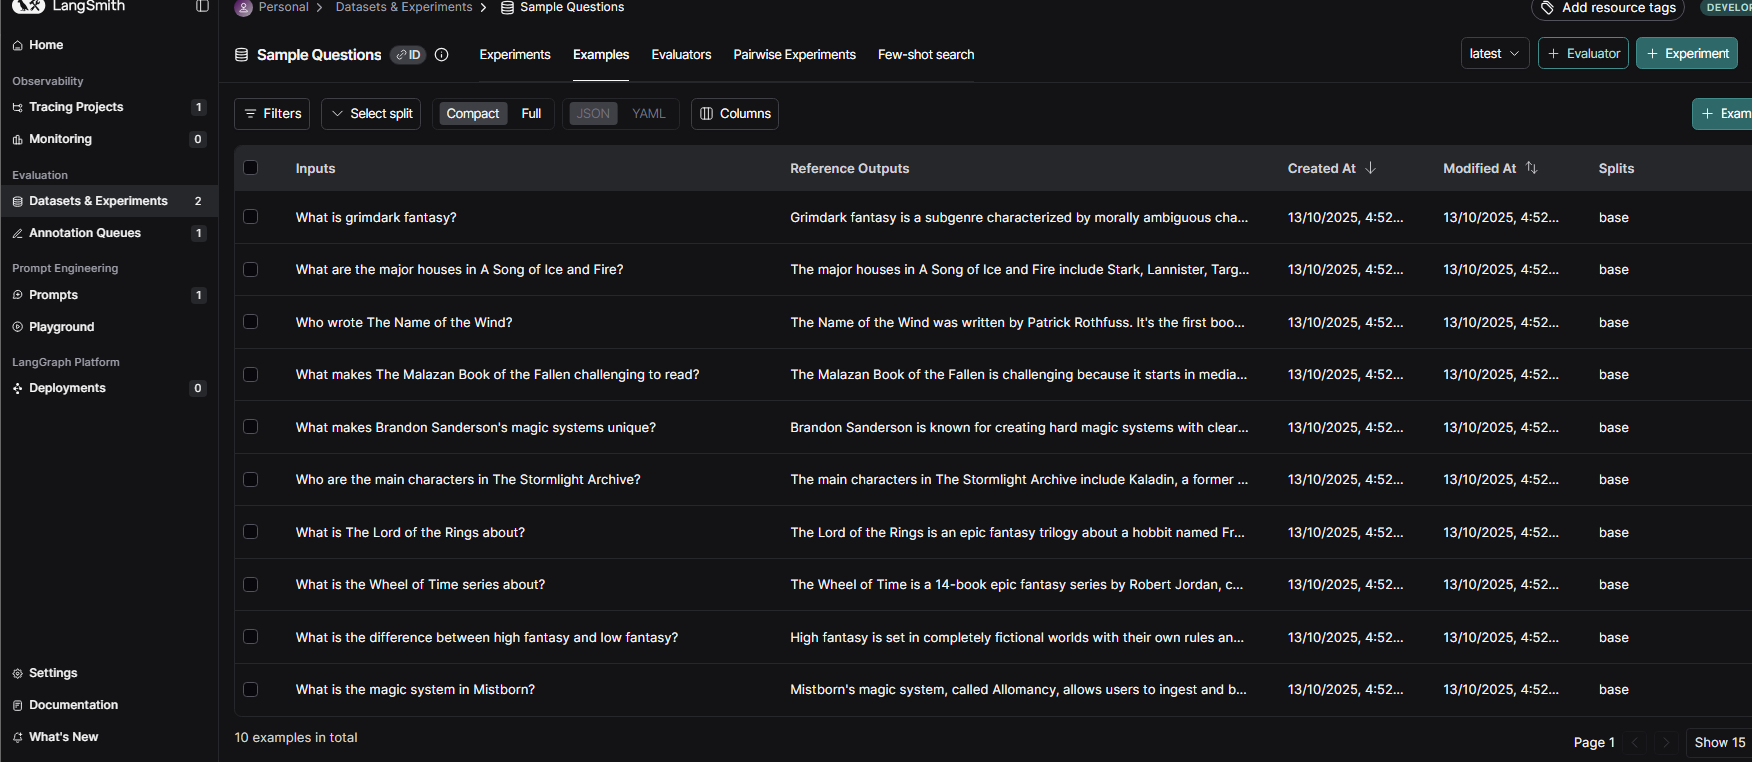
#as we can see our dataset has been created here for experimentation 

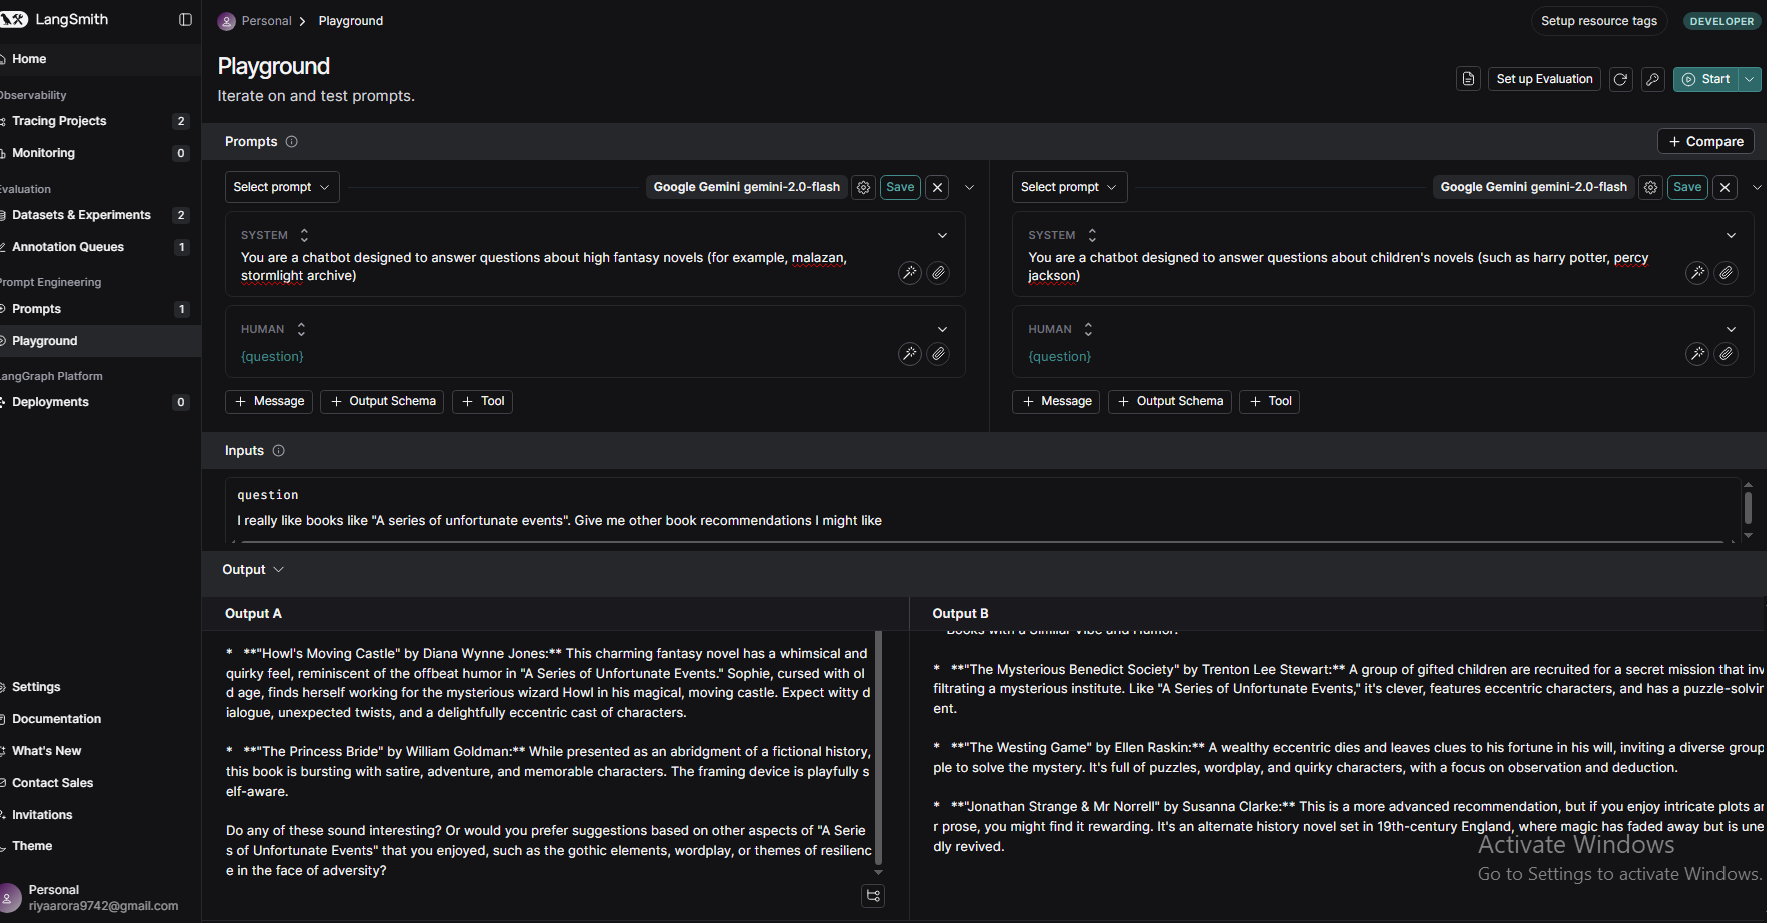
#as we can see in the langsmith dashboard playground we can use different models and providers. I have used gemini-flash-2.0 and have switched from the openAI standard. in this screenshot we can see a comparison of two different System Prompts have yielded very different outputs even with the same Human question. The question asks about book recommendations and the two outputs from the two different System prompts give very different book reccomendations due to their configuration

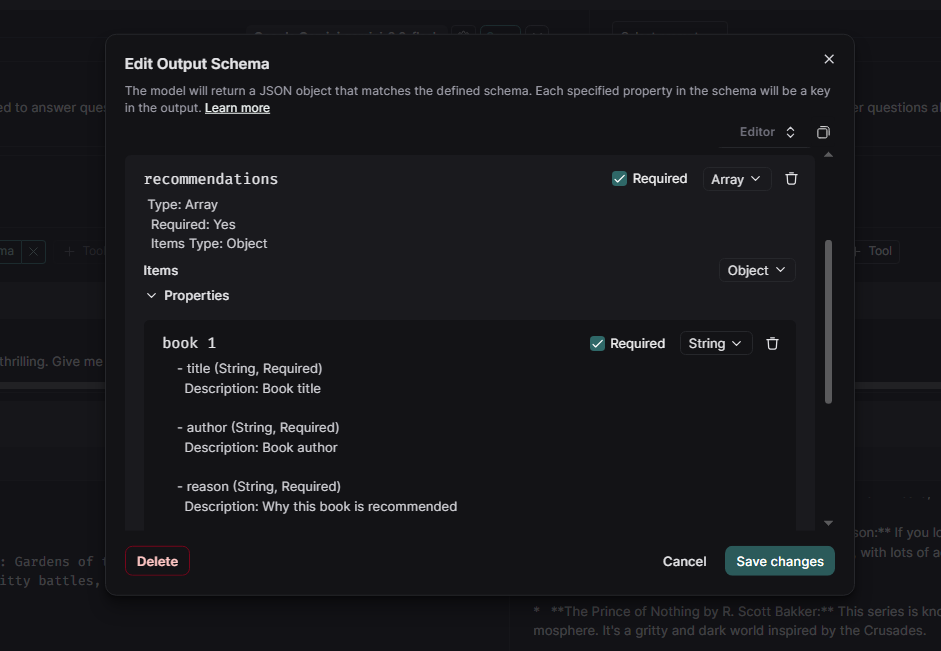
#here is an output schema I have defined for the model to give its output in. It is an Array of Objects with each object being a book reccomendation along with different fields with important information like author and genre. 

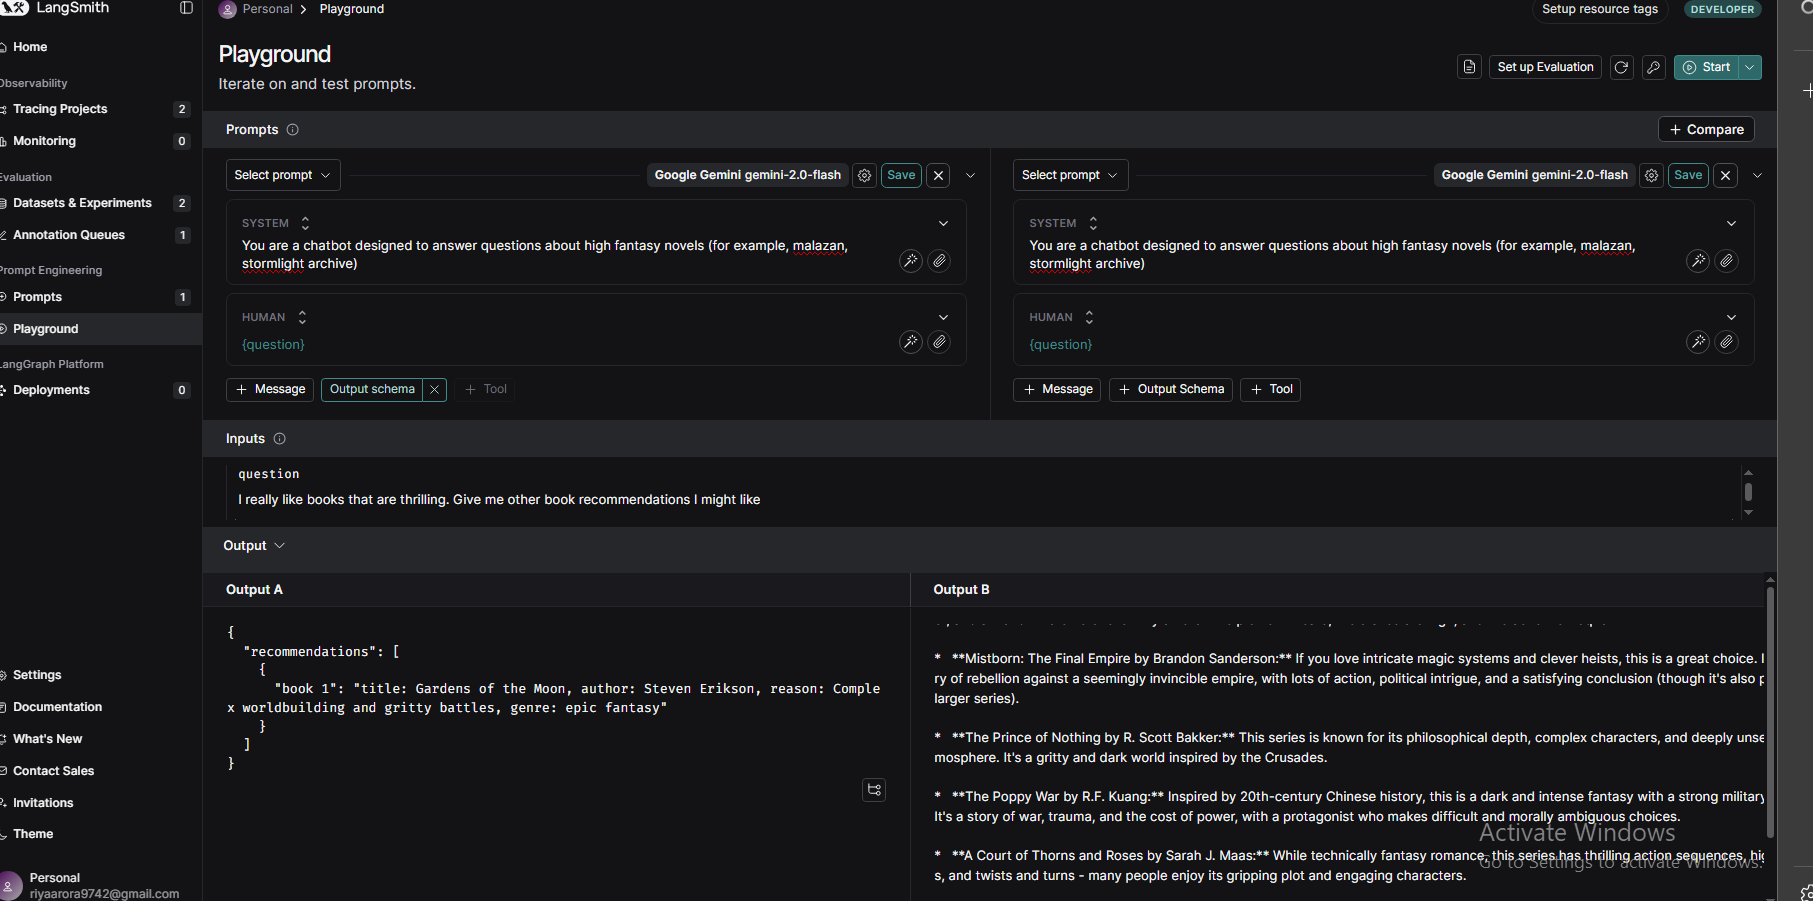
#here is a clear demonstration of the comparison between the output without an output schema and with my own custom output schema with the same question and system prompt

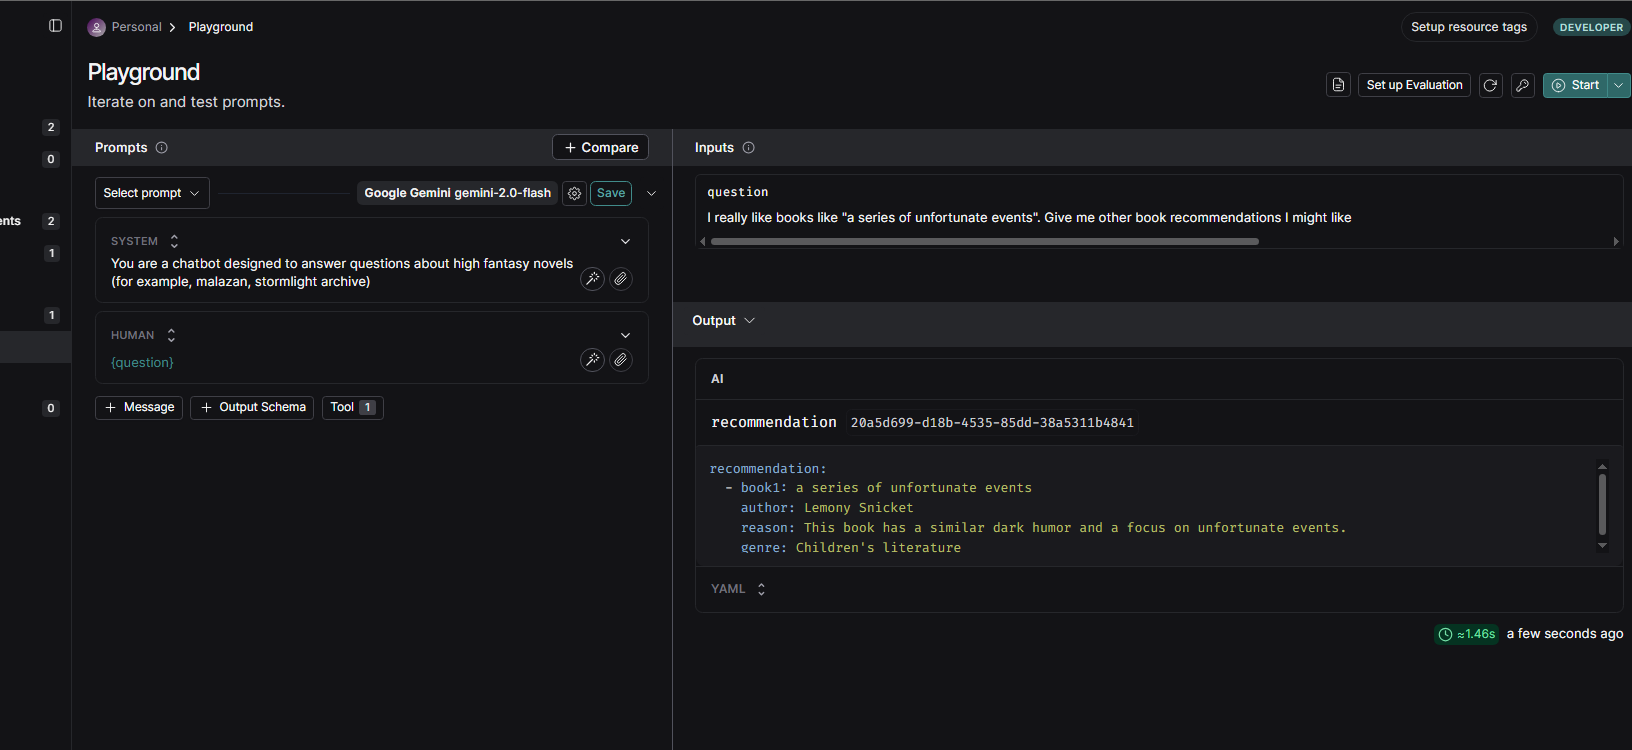
#using tools

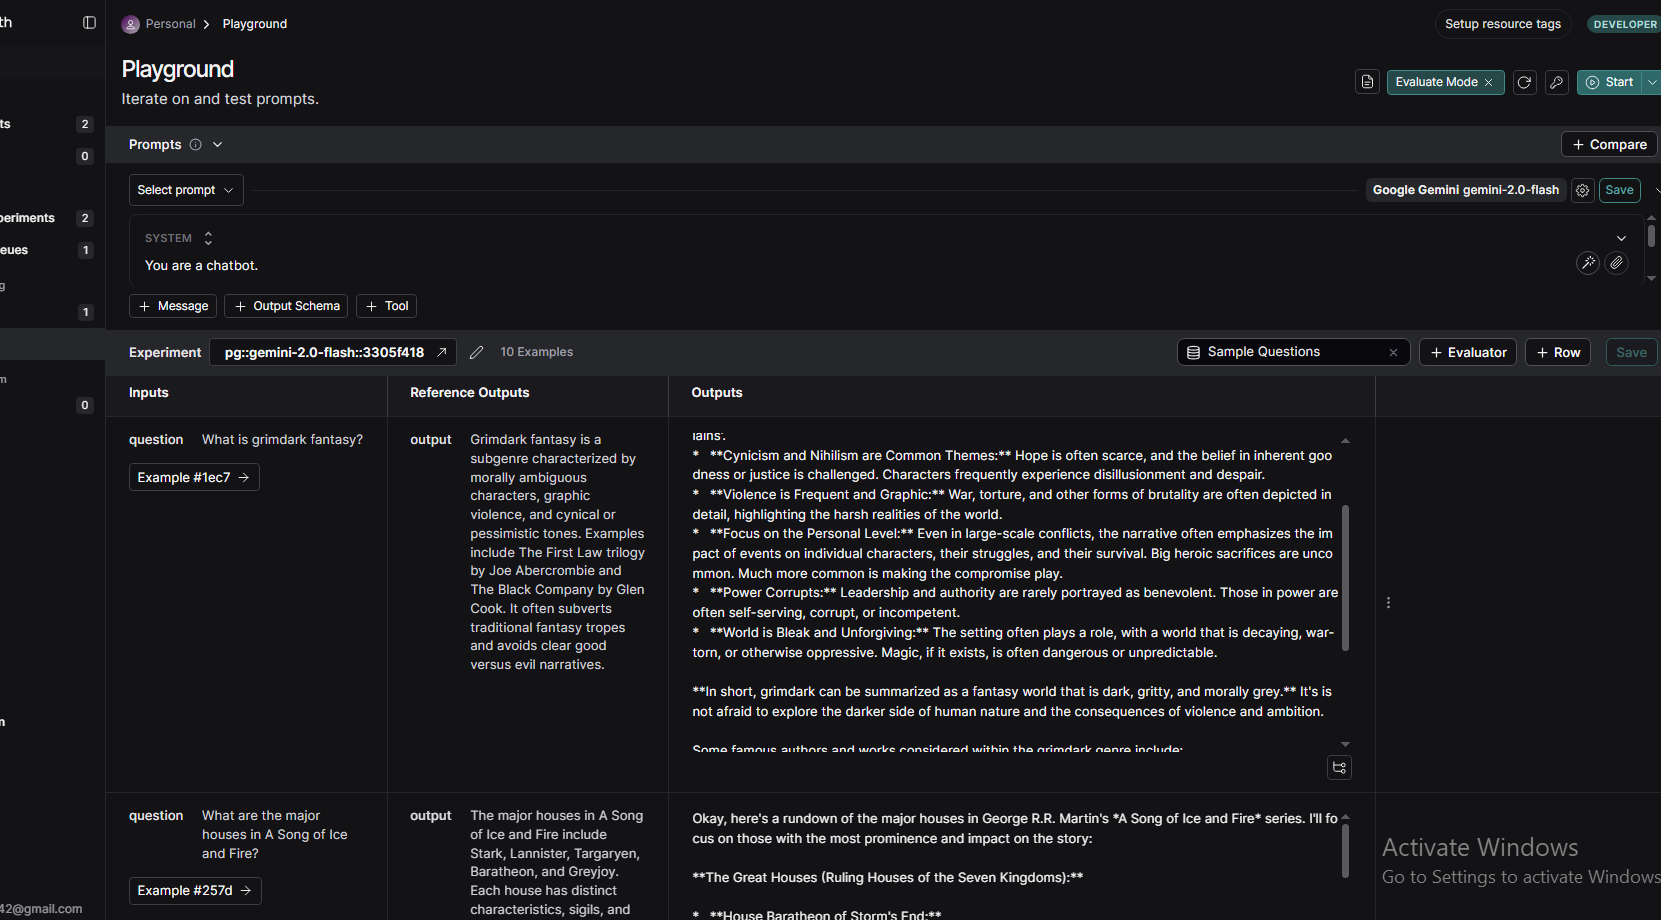

In [ ]:
#this is the implementation over my custom dataset with referece outputs 